

---



In [ ]:
!pip install -Uq lightkurve --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 16.7 MB/s eta 0:00:00


In [ ]:
import lightkurve as lk

In [ ]:
pixelfile = lk.search_lightcurve('K2-18')[1].download()
lc = pixelfile.remove_outliers().flatten()

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

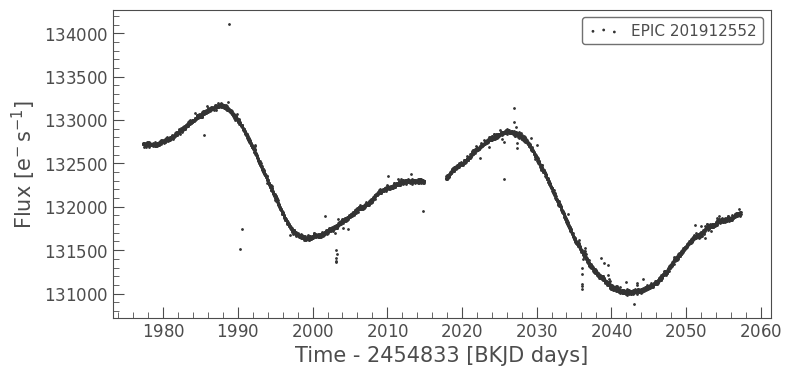

In [ ]:
pixelfile.remove_outliers().scatter()

In [ ]:
bls = lc.to_periodogram('bls', maximum_period = 34.8)
period = bls.period_at_max_power.value
t0 = bls.transit_time_at_max_power
duration = bls.duration_at_max_power
model = bls.get_transit_model(period, duration, t0)

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

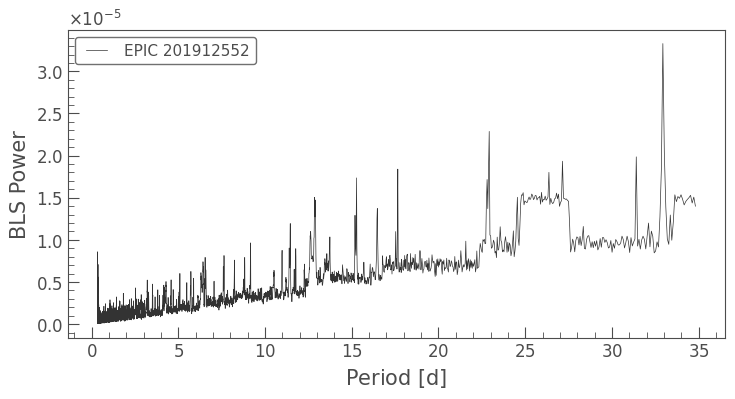

In [ ]:
bls.plot()

(0.995, 1.005)

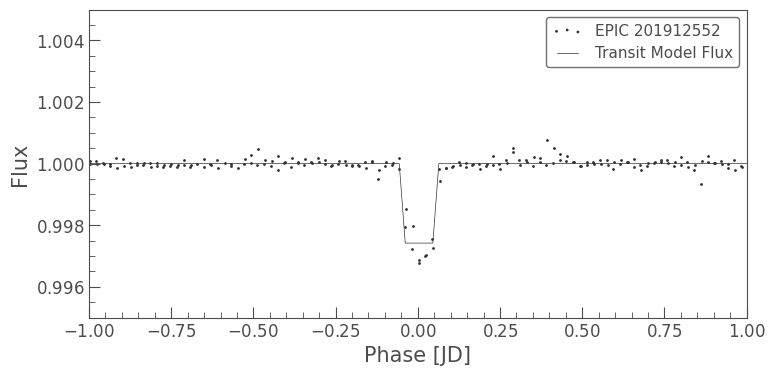

In [ ]:
ax = lc.fold(period, t0).scatter()
model.fold(period, t0).plot(ax = ax)
ax.set_xlim(-1,1)
ax.set_ylim(0.995,1.005)



---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

In [ ]:
data_RV = pd.read_csv('/content/K2-18b RV.txt', sep = ' ')

In [ ]:
data_RV['RV'] = (data_RV['RV'] - data_RV['RV'].mean())
data_RV['error'] = np.abs(data_RV['error'] - data_RV['error'].mean())

In [ ]:
ts = data_RV['Time'].to_numpy()
RV = data_RV['RV'].to_numpy()
err_RV = data_RV['error'].to_numpy()

In [ ]:
ls = LombScargle(ts, RV, err_RV)
freq, power = ls.autopower()
period = 1/freq[np.argmax(power)]
# t_fit = np.linspace(0, period, 75)
t_fit = np.linspace(0, 1)
RV_fit = ls.model(t_fit, 1/period)

Text(0.5, 0, 'BJD-2450000')

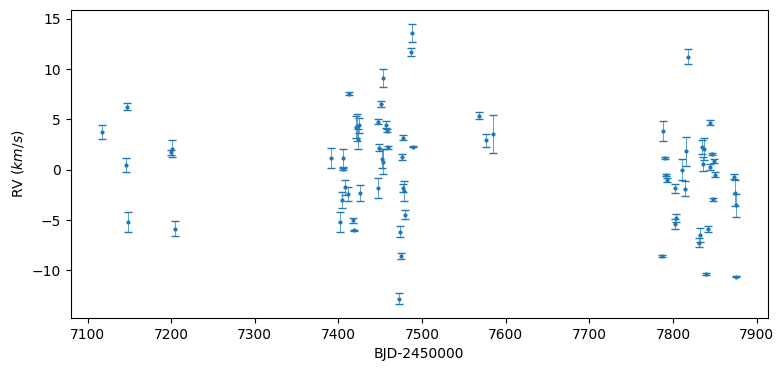

In [ ]:
plt.figure(figsize = (9,4))
plt.errorbar(ts, RV, err_RV, fmt = 'o',
             capsize = 3, elinewidth = 0.5,
             markersize = 2)
plt.ylabel('RV ($km/s$)')
plt.xlabel('BJD-2450000')

Text(0.5, 0, 'Period ($d$)')

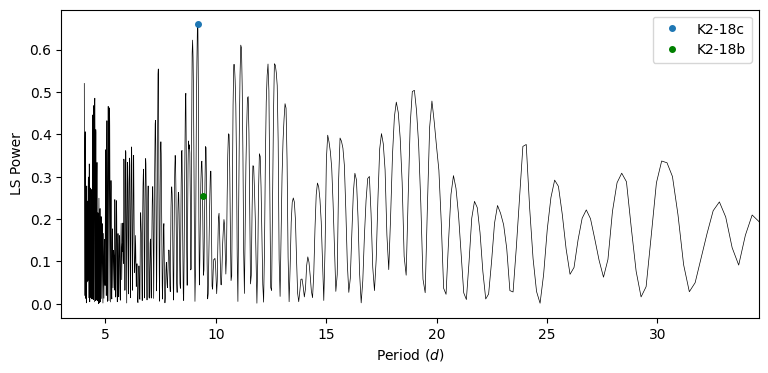

In [ ]:
plt.figure(figsize = (9,4))
plt.plot(1/freq, power, linewidth = 0.5, color = 'k')
plt.xlim(3,34.6)
plt.plot(period,
         np.max(power), 'o',label = 'K2-18c',
         markersize = 4)
plt.plot(period+0.25, 0.254747156,
         'o', label = 'K2-18b',
         markersize = 4, color = 'green')
plt.legend()
plt.ylabel('LS Power')
plt.xlabel('Period ($d$)')

Text(0.5, 0, 'Phase ($d$)')

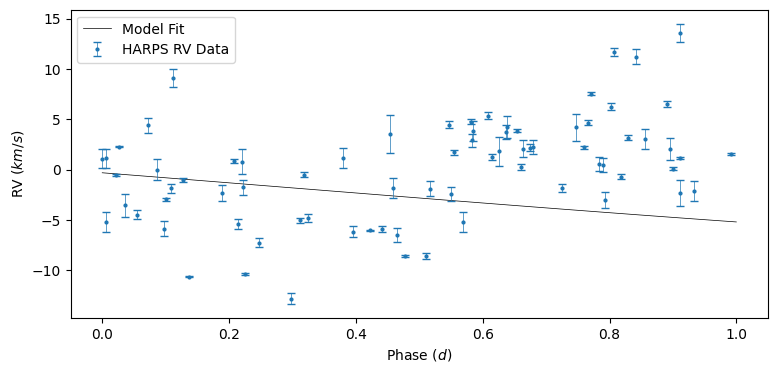

In [ ]:
plt.figure(figsize = (9,4))
plt.plot(t_fit, RV_fit, color = 'k',
         label = 'Model Fit', linewidth = 0.5)
plt.errorbar((ts%period)/period, RV, err_RV, fmt='o',
             capsize=3, elinewidth=0.5,
             markersize = 2, label = 'HARPS RV Data')
plt.legend()
plt.ylabel('RV ($km/s$)')
plt.xlabel('Phase ($d$)')



---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# T_eff = 3457
# T_star = T_eff - 5780

S_sun = np.array([1.7763, 1.0385, 1.0146, 0.3507, 0.3207])
a = np.array([1.4335e-4, 1.2456e-4, 8.1884e-5, 5.9578e-5, 5.4471e-5])
b = np.array([3.3954e-9, 1.4612e-8, 1.9394e-9, 1.6707e-9, 1.5275e-9])
c = np.array([-7.6364e-12, -7.6345e-12, -4.3618e-12, -3.0058e-12, -2.1709e-12])
d = np.array([-1.1950e-15, -1.7511e-15, -6.8260e-16, -5.1925e-16, -3.8282e-16])

# S_eff = S_sun + a*T_star + b*(T_star**2) + c*(T_star**3) + d*(T_star**4)

# L = 10**-1.6

# d = (L/S_eff)**0.5

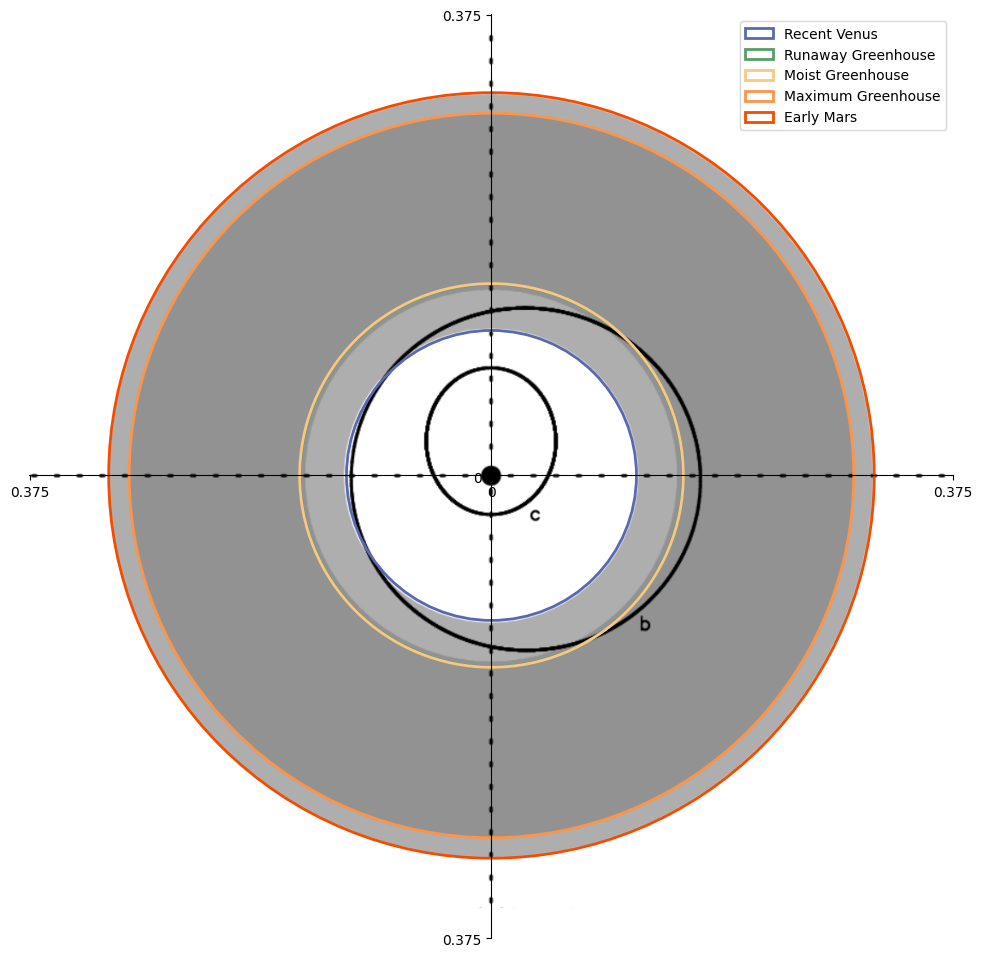

In [ ]:
ruta_imagen = '/content/imagen.png'
imagen = mpimg.imread(ruta_imagen)

fig, ax = plt.subplots(figsize = (12,12))
plt.imshow(imagen)

labels = ['Recent Venus', 'Runaway Greenhouse',
          'Moist Greenhouse', 'Maximum Greenhouse',
          'Early Mars']

colors = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']

for i in range(5):

  circle = plt.Circle((540,538.5), d[i]*1320,
                      edgecolor = colors[i], facecolor='none',
                      label = labels[i], linewidth = 2)

  plt.gca().add_patch(circle)


ax.spines['left'].set_position(('data', 540))
ax.spines['bottom'].set_position(('data', 538.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

nuevos_valores = [0.375,0,0.375] # Nuevos valores para el eje Y
viejos = np.linspace(0,1080,3)

plt.xticks(viejos, nuevos_valores)  # Cambia las marcas del eje X
plt.yticks(viejos, nuevos_valores)

plt.legend()
plt.show()



---



In [ ]:
import numpy as np
import astropy.constants as co

In [ ]:
M_sun = co.M_sun.value
L_sun = co.L_sun.value
R_sun = co.R_sun.value
sigma = co.sigma_sb.value

M = np.linspace(0.38, 1.05, 9)
alpha = 4.841
ctes = np.exp(-0.026)

L = ctes*(M**alpha)

R = 0.438*(np.ravel(M)**2) + 0.479*np.ravel(M) + 0.075

T_eff = (L*L_sun/(4*np.pi*((R*R_sun)**2)*sigma))**0.25

T_star = T_eff - 5780

S_eff = [S_sun + a*T + b*(T**2) + c*(T**3) + d*(T**4)
        for T in T_star]

ds = np.array([(L[i]/S_eff[i])**0.5 for i in range(9)])

Text(0, 0.5, '$M\\,(M_\\odot)$')

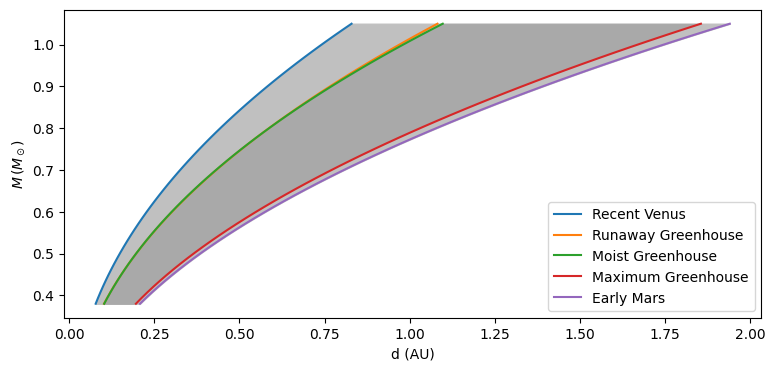

In [ ]:
colors = ['silver']*2 + ['darkgrey'] + ['silver']

plt.figure(figsize = (9,4))
for i in range(5):
  plt.plot(ds[:,i], M, label = labels[i])

for i in range(4):
  plt.fill_betweenx(M, ds[:,i], ds[:,i+1], color = colors[i])
plt.legend()
plt.xlabel('d (AU)')
plt.ylabel('$M\,(M_\odot)$')